<a href="https://colab.research.google.com/github/JohnnyT213/CDPHC2_sales_prediction/blob/main/PALIMA_Sales_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing the Data ⚾

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
filename = '/content/drive/MyDrive/sales_predictions.csv'

In [ ]:
fmcgdata = pd.read_csv(filename)
fmcgdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
fmcgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We see there are a lot of missing values under Outlet_Size and also Item_Weight. Upon manually checking each column with .value_counts(), we realize that we can fill in Outlet_Size because there are 10 unique stores, with each Outlet_Identifier value corresponding to a size. 

## Filling in Object-Type Missing Data



Some of the missing data can be filled in. 

In [ ]:
fmcgdata['Outlet_Identifier'].value_counts() #There are 10 outlets
#Though there are many missing values under outlet size, we can surmise that these 10 outlets correspond to specific sizes

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
fmcgdata['Outlet_Size'].value_counts() #There are 3 sizes

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

We filter to check what sizes are our 10 distinct outlets.



In [ ]:
fm = fmcgdata['Outlet_Size'] == 'Medium'
fmcgdata_fm = fmcgdata.loc[fm, :]
fmcgdata_fm['Outlet_Identifier'].value_counts() 
# OUT049 and OUT018 are Medium sized outlets

OUT027    935
OUT049    930
OUT018    928
Name: Outlet_Identifier, dtype: int64

In [ ]:
fs = fmcgdata['Outlet_Size'] == 'Small'
fmcgdata_fs = fmcgdata.loc[fs, :]
fmcgdata_fs['Outlet_Identifier'].value_counts() 
# OUT046 and OUT035 are Small sized outlets

OUT046    930
OUT035    930
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
fh = fmcgdata['Outlet_Size'] == 'High'
fmcgdata_fh = fmcgdata.loc[fh, :]
fmcgdata_fh['Outlet_Identifier'].value_counts() 
# OUT271 is a High sized outlet

OUT013    932
Name: Outlet_Identifier, dtype: int64

In [ ]:
fmi = fmcgdata['Outlet_Size'].isna()
fmcgdata_fmi = fmcgdata.loc[fmi, :]
fmcgdata_fmi['Outlet_Identifier'].value_counts() 

#OUT045, OUT017, OUT010 have missing outlet sizes

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

We now fill in the missing rows based on the info we got. 

OUT046 = Small

OUT035 = Small

OUT019 = Small

OUT049 = Medium

OUT018 = Medium

OUT027 = Medium

OUT013 = High
 

In [ ]:
soa = fmcgdata['Outlet_Identifier'] == 'OUT046' 
fmcgdata.loc[soa, : ]
fmcgdata['Outlet_Size'].fillna('Small', inplace = True)


In [ ]:
sob = fmcgdata['Outlet_Identifier'] == 'OUT035' 
fmcgdata.loc[sob, : ]
fmcgdata['Outlet_Size'].fillna('Small', inplace = True)


In [ ]:
soc = fmcgdata['Outlet_Identifier'] == 'OUT019' 
fmcgdata.loc[soc, : ]
fmcgdata['Outlet_Size'].fillna('Small', inplace = True)

In [ ]:
moa = fmcgdata['Outlet_Identifier'] == 'OUT049' 
fmcgdata.loc[moa, : ]
fmcgdata['Outlet_Size'].fillna('Medium', inplace = True)

In [ ]:
mob = fmcgdata['Outlet_Identifier'] == 'OUT018' 
fmcgdata.loc[mob, : ]
fmcgdata['Outlet_Size'].fillna('Medium', inplace = True)

In [ ]:
moc = fmcgdata['Outlet_Identifier'] == 'OUT027' 
fmcgdata.loc[moc, : ]
fmcgdata['Outlet_Size'].fillna('Medium', inplace = True)

In [ ]:
hoa = fmcgdata['Outlet_Identifier'] == 'OUT013' 
fmcgdata.loc[hoa, : ]
fmcgdata['Outlet_Size'].fillna('High', inplace = True)

In [ ]:
fmcgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
fmcgdata['Outlet_Size'].value_counts()
#We compare the number of values from before we filled in to now
#Small     2388
#Medium    2793
#High       932

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

#Removing (or actually Filling In) More Missing Data ⏰

Now, let's check the other column with missing values -- Item_Weight

In [ ]:
filter_w = fmcgdata['Item_Weight'].isna()
w = fmcgdata.loc[filter_w, :]
w

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


It looks like the number of missing values here exceed 10% of the total number of rows which is 8523 (853 rows) -- so we have to figure out how to fill in the missing data. 

What if we derive estimates from the characteristics of these items missing a weight? 

#Cleaning columns for data inconsistencies ⏰
Let's clean and check each column more closely before we try and fill in the missing values in Item_Weight. 

##Object data columns 

Item_Identifier column ⏰ 
- has repeat value counts, but each row of data is unique

In [ ]:
fmcgdata['Item_Identifier'].value_counts() #labels here are alphanumeric, with some values re-appearing

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
#Filter to slice and check if repeat FDQ56 are erroneous
II_FDQ56 = fmcgdata['Item_Identifier'] == 'FDQ56'
fmcgdata.loc[II_FDQ56, :] #upon loading and checking other columns, we see each item is unique 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
272,FDQ56,6.59,Low Fat,0.105509,Fruits and Vegetables,85.6908,OUT013,1987,High,Tier 3,Supermarket Type1,1929.4884
395,FDQ56,6.59,Low Fat,0.105761,Fruits and Vegetables,84.8908,OUT049,1999,Medium,Tier 1,Supermarket Type1,1677.8160
877,FDQ56,6.59,Low Fat,0.105577,Fruits and Vegetables,85.6908,OUT035,2004,Small,Tier 2,Supermarket Type1,1929.4884
1386,FDQ56,NaN,Low Fat,0.105086,Fruits and Vegetables,82.3908,OUT027,1985,Medium,Tier 3,Supermarket Type3,3691.1952
1522,FDQ56,6.59,Low Fat,0.105597,Fruits and Vegetables,83.4908,OUT046,1997,Small,Tier 1,Supermarket Type1,1342.2528
1668,FDQ56,6.59,Low Fat,0.106027,Fruits and Vegetables,83.9908,OUT018,2009,Medium,Tier 3,Supermarket Type2,1426.1436
6080,FDQ56,6.59,Low Fat,0.176748,Fruits and Vegetables,82.7908,OUT010,1998,Small,Tier 3,Grocery Store,83.8908


###Item_Fat_Content column ⏰

In [ ]:
fmcgdata['Item_Fat_Content'].value_counts() #there are inconsistencies with the labels. Low Fat = LF = low fat, Regular = regular = reg

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#We use .replace({ : }), inplace=True, a dictionary, to streamline the labels
fmcgdata['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular', 'regular': 'Regular'}, inplace=True)
fmcgdata['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Item_type column ⏰

In [ ]:
fmcgdata['Item_Type'].value_counts() #checking the unique values, there does not seem to be any inconsistencies with the labels
# all the labels look unique 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

###Outlet_Identifier column ⏰

In [ ]:
fmcgdata['Outlet_Identifier'].value_counts() #all labels are unique

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

###Outlet_Size column ⏰

In [ ]:
fmcgdata['Outlet_Size'].value_counts() #distinct size labels, all unique and valid

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

###Outlet_Location_Type ⏰

In [ ]:
fmcgdata['Outlet_Location_Type'].value_counts() #distinct tier names, no inconsistencies

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

### Outlet_Type ⏰

In [ ]:
fmcgdata['Outlet_Type'].value_counts() #2 kinds of supermarkets

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### CONCLUSION: Item_Fat_Content object values were revised. Other columns are okay.

Going back to the problem of missing data in Item_Weight, we can estimate the weights of items with missing weight values. Let's interpolate the values across each item type. 

In [ ]:
w['Item_Type'].value_counts() #there are the items with missing weights

Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: Item_Type, dtype: int64

In [ ]:
#We make a for-loop with a filter that isolates unique Item_Type values, aka Item Types (Seafood, etc.)
#We then interpolate each group of item weight data, grouped based on item type

item_type = fmcgdata['Item_Type'].unique()
for item in item_type:
  #print(item)
  filter = fmcgdata['Item_Type'] == item #you now have a filter that is dynamic based on item type
  fmcgdata.loc[filter, :] = fmcgdata.loc[filter, :].interpolate(method = 'linear')
  #loop gets all the item types, therefore each item type is automatically filtered and the interpolate is applied

check = fmcgdata['Item_Weight'].isna()
#We find out there are more missing values so we manually fill them in the with means of the items weights filtered to specific item types
fmcgdata.iloc[18, 1] = 11.40
fmcgdata.iloc[29, 1] = 12.30
fmcgdata.iloc[231, 1] = 12.55

fmcgdata.loc[check, :]

fmcgdata.info()



 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Lets declare our Dataframe to use based on these interpolated columns.

In [ ]:
df = fmcgdata
df.info() #Looks like our data is ready for visualization! But let's double check the int and float columns first. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Float and int data columns

In [ ]:
df['Item_Weight'].value_counts()

12.150000    88
17.600000    84
11.800000    79
13.650000    78
15.100000    72
             ..
14.633333     1
9.630000      1
10.065000     1
8.097500      1
16.825000     1
Name: Item_Weight, Length: 1406, dtype: int64

In [ ]:
#This code section checks for items that weigh 10 or below
df_iw_s = df['Item_Weight'] >= 1
df_iw_e = df['Item_Weight'] <= 10

df_iw_lower = df.loc[df_iw_s & df_iw_e, :]
df_iw_lower.value_counts()
df_iw_lower['Item_Type'] #We check what sorts of items weigh this much, then we compare to items that exceed 10 in the following code section

0                       Dairy
1                 Soft Drinks
4                   Household
15                  Breakfast
17                  Breakfast
                ...          
8507             Frozen Foods
8509    Fruits and Vegetables
8518              Snack Foods
8519             Baking Goods
8521              Snack Foods
Name: Item_Type, Length: 2747, dtype: object

In [ ]:
#df['Item_Weight'].value_counts()

df_iw_su = df['Item_Weight'] >= 11
df_iw_eu = df['Item_Weight'] <= 20

df_iw_upper = df.loc[df_iw_su & df_iw_eu, :]
df_iw_upper['Item_Type'].value_counts() #compared to previous range, most items do not weigh heavy. 

#We did this to help us process if there are any weight unit inconsistencies; 
#e can assume there are none, and items are being weighed in pounds or lbs

Fruits and Vegetables    734
Snack Foods              693
Frozen Foods             516
Household                471
Dairy                    403
Canned                   359
Health and Hygiene       320
Baking Goods             314
Meat                     256
Soft Drinks              225
Breads                   121
Others                   120
Starchy Foods            104
Hard Drinks               93
Breakfast                 46
Seafood                   31
Name: Item_Type, dtype: int64

###Item_visibility ⚓

In [ ]:
df['Item_Visibility'].value_counts() 
#Interestingly, there are some items that are completely invisible. 
#Let's take a look at these items

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [ ]:
#From a marketing perspective, these items are important because they are not giving any profit
df_IV_zero = df['Item_Visibility'] == 0
df_IV_zero_filter = df.loc[df_IV_zero, :]
df_IV_zero_filter
#The question is, do we remove these data rows? For now, we don't 
#Otherwise, this column has unique and valid values

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2000,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.9300,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.3950,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.8000,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.7000,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,8.8475,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.8650,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.0000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744
8494,NCI54,15.2000,Low Fat,0.0,Household,110.4912,OUT017,2007,Small,Tier 2,Supermarket Type1,1637.8680


### Item_MRP column ⚓

In [ ]:
df['Item_MRP'].value_counts() #We can assume MRP means retail price
#This column has one of the highest unique values so far compared to other numerical data type columns


172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

###Outlet_Establishment_Year ⚓

In [ ]:
df['Outlet_Establishment_Year'].value_counts() #These dates look unique and valid, when the unique outlets were established; same numner of unique values as the Outlet_Identifier column

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

###Item_Outlet_Sales ⚓

In [ ]:
df['Item_Outlet_Sales'].value_counts() #unique total sale values; interesting how some values repeat

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [ ]:
#We check the rows of data with the same sales
df_IOS_a = df['Item_Outlet_Sales'] == 1713.7692
df_IOS_a_filter = df.loc[df_IOS_a, :] 
df_IOS_a_filter
#We discover each item was different, but amazingly garnered the same total sales amount across different outlets item types

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
473,FDT09,15.150,Regular,0.012282,Snack Foods,132.5284,OUT049,1999,Medium,Tier 1,Supermarket Type1,1713.7692
1184,FDV44,8.365,Regular,0.039906,Fruits and Vegetables,191.3188,OUT049,1999,Medium,Tier 1,Supermarket Type1,1713.7692
1214,NCN07,18.500,Low Fat,0.033916,Others,130.9284,OUT013,1987,High,Tier 3,Supermarket Type1,1713.7692
1511,NCC31,8.020,Low Fat,0.000000,Household,157.7972,OUT013,1987,High,Tier 3,Supermarket Type1,1713.7692
2120,FDK16,9.065,Low Fat,0.115800,Frozen Foods,95.3094,OUT018,2009,Medium,Tier 3,Supermarket Type2,1713.7692
4735,FDL14,8.115,Regular,0.032159,Canned,154.8972,OUT046,1997,Small,Tier 1,Supermarket Type1,1713.7692
5247,DRG37,16.200,Low Fat,0.019362,Soft Drinks,154.6972,OUT013,1987,High,Tier 3,Supermarket Type1,1713.7692
6586,FDD57,18.100,Low Fat,0.022526,Fruits and Vegetables,95.0094,OUT017,2007,Small,Tier 2,Supermarket Type1,1713.7692
7399,FDK16,9.065,Low Fat,0.115564,Frozen Foods,96.0094,OUT045,2002,Small,Tier 2,Supermarket Type1,1713.7692


###CONCLUSION: All the numerical data looks good. There were some items with 0 Item_Visibility: might be good to check later. 

###Summary Statistics ⏰

In [ ]:
df.describe() #instead of manually going over each column, we can just use .describe () to get descriptive statistics table for all numerical data columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.864244,0.066132,140.992782,1997.831867,2181.288914
std,4.453002,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.600000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Statistical Analyses ⚡

## Histograms ⚡ of Object Type Data

### Item Frequency based on Fat Content

([0, 1], <a list of 2 Text major ticklabel objects>)

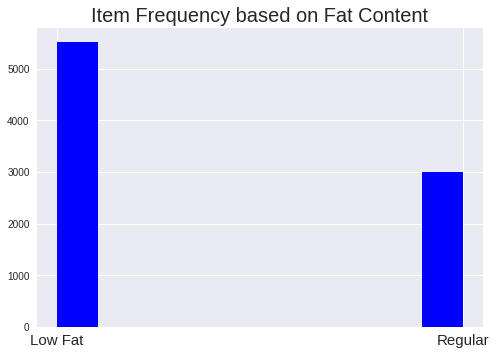

In [ ]:
plt.style.use('seaborn')
df['Item_Fat_Content'].hist(color = 'b'); #we create a histrogram with the seaborn style
plt.title('Item Frequency based on Fat Content', fontsize = 20); #we add a title 
plt.xticks(fontsize = 15)


Wow, more items are low fat than regular. 

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Item Frequency Based on Item Type 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

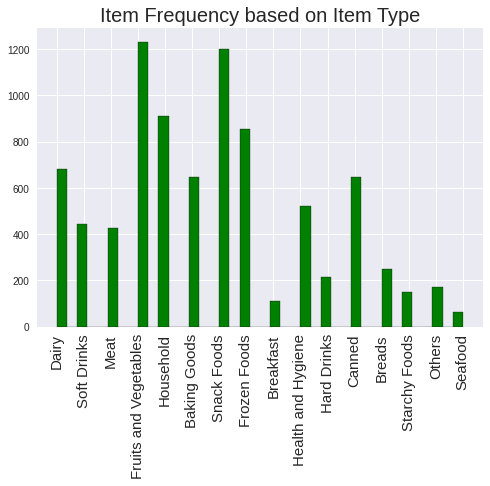

In [ ]:
plt.style.use('seaborn')
df['Item_Type'].hist(bins = 40, edgecolor = 'k', color = 'g'); #because there are many items, we adjust the bin value to make everything fit
plt.title('Item Frequency based on Item Type', fontsize = 20); 
plt.xticks(fontsize = 15, rotation = 90) #we adjust the xticks or column names by increasing the size and rotating by 90 degrees

With this histogram, we see the highest number of grocery items are snack foods and fruits and vegetables. The smallest number of items are found in the seafood and breakfast sections. 

### Item Frequency Based on Outlet_Identifier

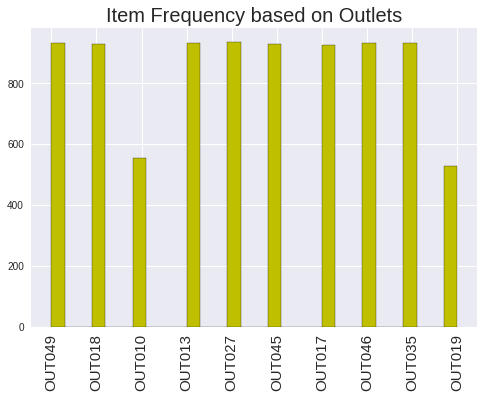

In [ ]:
plt.style.use('seaborn')
df['Outlet_Identifier'].hist(bins = 30, edgecolor = 'k', color = 'y'); 
plt.title('Item Frequency based on Outlets', fontsize = 20); 
plt.xticks(fontsize = 15, rotation = 90);

We see items in the data frame are spread out across the outlets. OUT010 and OUT019 have less items than the others. 

### Item Frequency Based on Outlet Categories

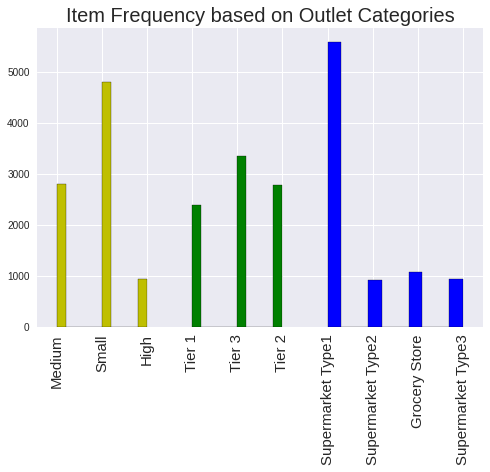

In [ ]:
plt.style.use('seaborn')
df['Outlet_Size'].hist(bins = 10, edgecolor = 'k', color = 'y');
df['Outlet_Location_Type'].hist(bins = 10, edgecolor = 'k', color = 'g');
df['Outlet_Type'].hist(bins = 10, edgecolor = 'k', color = 'b'); 
plt.title('Item Frequency based on Outlet Categories', fontsize = 20); 
plt.xticks(fontsize = 15, rotation = 90);

We see how items are spread across how outlets are classified. We noticed how most of the data rows come from supermarkets, small outlets, and tier 3 outlets. 

### Note: We don't get a histogram of items based on Item_Identifier because there would be too many unique values. 

## Boxplots 🐻 of Weight, Visibility, and Outlet Sales Data

We get boxplots of item weight and visibility, and outlet sales, data based on item type. This is to compare the descriptive statistics of each grouping visually. 

We don't get the boxplots of Outlet_Establishment_Year because it refers to outlet creation dates. 

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.864244,0.066132,140.992782,1997.831867,2181.288914
std,4.453002,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.600000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Item Weights Compared Based on Item Type 

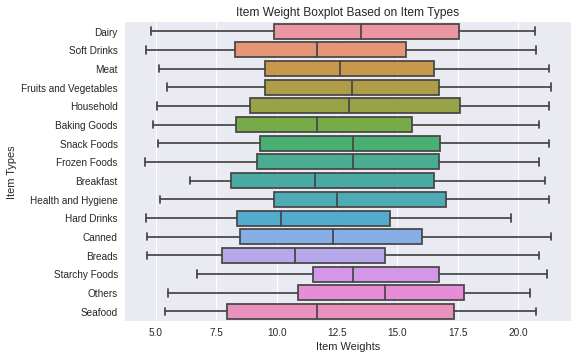

In [ ]:
sns.boxplot(x = 'Item_Weight', y = 'Item_Type', 
            data = df).set(title = 'Item Weight Boxplot Based on Item Types', 
            xlabel='Item Weights', ylabel='Item Types');
#We use seaborn to easily make a boxplot and observe the distribution of Item Weight means based on Item Type
#Most items generally weigh between 7.5 to 17.5 with all item types having similar min and max ranges; no outliers

### Item Visibility based on Item Types

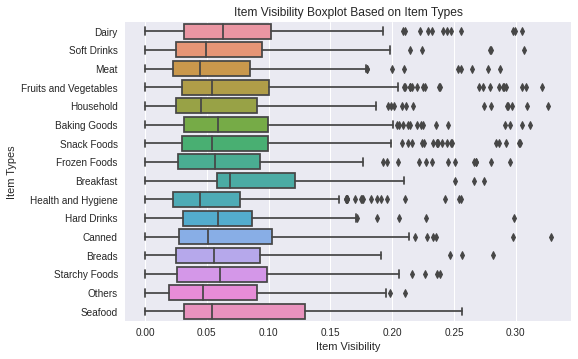

In [ ]:
IV = df['Item_Visibility']
sns.boxplot(x = 'Item_Visibility', y = 'Item_Type', 
            data = df).set(title = 'Item Visibility Boxplot Based on Item Types', 
            xlabel='Item Visibility', ylabel='Item Types');

#We see there are many outliers but in general, all item types have around between 0.5 visiblity more or less

### Item MRP (retail price) based on Item Types

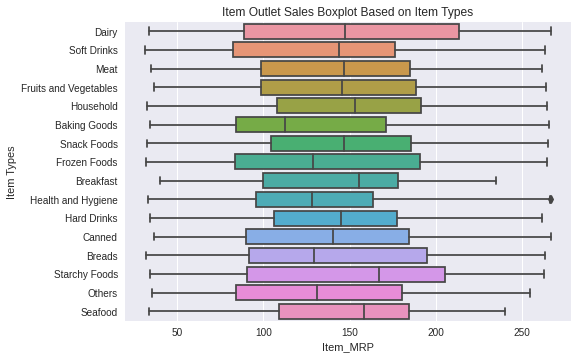

In [ ]:
sns.boxplot(x = 'Item_MRP', y = 'Item_Type', 
            data = df).set(title = 'Item Outlet Sales Boxplot Based on Item Types', 
            xlabel='Item_MRP', ylabel='Item Types');

### Item Outlet Sales based on Item Types

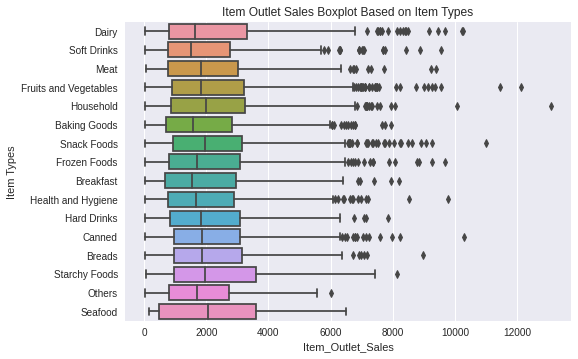

In [ ]:
sns.boxplot(x = 'Item_Outlet_Sales', y = 'Item_Type', 
            data = df).set(title = 'Item Outlet Sales Boxplot Based on Item Types', 
            xlabel='Item_Outlet_Sales', ylabel='Item Types');
#Similar amounts of item outlet sales across item types, with there being outliers but minimal overall variation, generally being less than 4000

## Correlations and Heatmaps 🔥

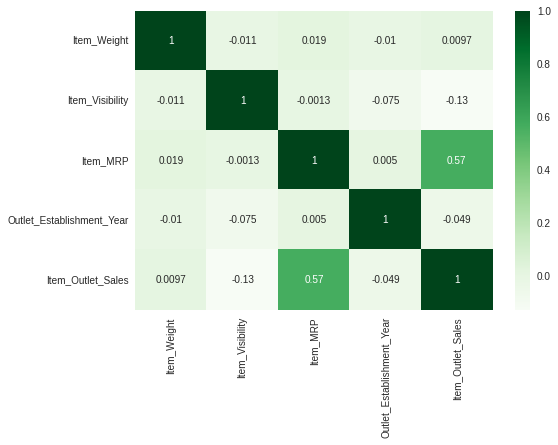

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap ='Greens', annot = True);
#We see immediately that Item_MRP and Item_Outlet_Sales show a moderate positive correlation: higher outlet sales means higher MRP
#Otherwise, there are no other moderate or strong correlation coefficients
#Item outlet sales and item visibility show a weak negative correlation relationship

### We discover that there is a moderate positive correlation betweem item MRP and outlet sales. The higher either value, it is likely the other will also increase in value. 

#Data Pre-Processing for Machine Learning Model

*   Identifying feature types for all columns
*   Ordinal Encoding
*   Train Test Split
*   Instantiate Column Selectors
*   Instantiate Column Transformers for Standardization and OHE
*   Set up pipelines
*   Instantiate Column Transformers as one pre-processing object/variable
*   Fit Pre-Processing Object to Train Data
*   Transform Pre-Processing Object to both Train and Test Data
*   Check Processed Train and Test Data





In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Feature Identification

'Item_Identifier' - Nominal 

'Item_Weight' - Numerical 

'Item_Fat_Content' - Numerical 

'Item_Visibility' - Numerical

'Item_Type' - Nominal 

'Item_MRP' - Numerical

'Outlet_Identifier' - Nominal 

'Outlet_Establishment_Year' - Numerical

'Outlet_Size' - Ordinal 
 
'Outlet_Location_Type' - Nominal 

'Outlet_Type' - Nominal 

'Item_Outlet_Sales' - Numerical 



In [ ]:
df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
replacement_dictionary = {'Small': 0, 'Medium': 1, 'High': 2}
df['Outlet_Size'].replace(replacement_dictionary, inplace = True)
df['Outlet_Size'].value_counts()

0    4798
1    2793
2     932
Name: Outlet_Size, dtype: int64

##TTS

In [ ]:
X = df.drop('Item_Outlet_Sales', axis = 1)
y = df['Item_Outlet_Sales'] #trying to predict calories based 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

##Instantiate Column Selectors for Standardization and OHE

In [ ]:
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

##Instantiate Column Tranformers

In [ ]:
# Imputers for numerical data
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

# Scaler for numerical data after imputing missing data 
scaler = StandardScaler()

# One-hot encoder for categorical data 
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

##Set up pipelines

In [ ]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

##Instantiate Column Transformers into one preprocessor object/variable

In [ ]:
# We use tuples to align the transformers to the right data
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fdf30c13790>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fdf312996d0>)])

##Fit the preprocessor into the train data

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fdf30c13790>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fdf312996d0>)])

##Transform the data

In [ ]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
X_train_processed

array([[ 0.77291401, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.52590318, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12530719,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.05360813, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.67113521, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.77291401, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
X_test_processed

array([[ 0.31257564, -0.77664625, -0.99881554, ...,  1.        ,
         0.        ,  0.        ],
       [-1.11784162,  0.1003166 , -1.58519423, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.3574867 , -0.48299432, -1.59578435, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.07966722,  1.21832428,  1.09397975, ...,  1.        ,
         0.        ,  0.        ],
       [-1.41874572, -0.77809567, -0.36679966, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.49221988, -0.77976293,  0.11221189, ...,  1.        ,
         0.        ,  0.        ]])

#Regression Models

Let's try out different methods of regression.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

##Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression #instantiate model
reg = LinearRegression()

In [ ]:
reg.fit(X_train_processed,y_train) #we use the processed X_train data

LinearRegression()

In [ ]:
train_preds = reg.predict(X_train_processed)
test_preds = reg.predict(X_test_processed)

###Evaluation with R^2 and RMSE

In [ ]:
train_score_LRM = reg.score(X_train_processed, y_train)
print(train_score) #keep mind of score, we'll compare later with other models

In [ ]:
test_score_LRM = reg.score(X_test_processed, y_test)
print(test_score)

In [ ]:
rmse_train_LRM = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test_LRM = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train_LRM)
print(rmse_test_LRM)

##Regression Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42) #we instantiate the decisiontreeregressor

In [ ]:
dec_tree.fit(X_train_processed, y_train) #model learns X and y's relationship based on X and y train data

In [ ]:
train_preds_DT = dec_tree.predict(X_train_processed) #get predicted values as numpy arrays 
test_preds_DT = dec_tree.predict(X_test_processed)

###Evaluate Model with R^2 and RMSE

In [ ]:
train_score_DT = dec_tree.score(X_train_processed, y_train)
print(train_score_DT) 

In [ ]:
test_score_DT = dec_tree.score(X_test_processed, y_test)
print(test_score_DT) #looks like the model is overfit

###Tuning the Regression Tree Model

In [ ]:
dec_tree.get_params() # we check for the parameters of our model 

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

In [ ]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
###Final: Fitted Regression Tree Model with set Depth of 5

In [ ]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

In [ ]:
train_preds_5DT = dec_tree_5.predict(X_train_processed) #get predicted values as numpy arrays 
test_preds_5DT = dec_tree_5.predict(X_test_processed)

In [ ]:
rmse_train_DT = np.sqrt(mean_squared_error(y_train, train_preds_5DT))
rmse_test_DT = np.sqrt(mean_squared_error(y_test, test_preds_5DT))
print(rmse_train_DT)
print(rmse_test_DT)

4) To finalize this project, you need to prepare an executive (non-technical) presentation about your project.

Create a slide deck for a non-technical audience presenting this data, your analysis, and model recommendations.

Do not include data cleaning, pre-processing, or exploration steps in your presentation.

Do include 2 insights from your analysis supported with appropriate "reporting" quality visuals.

Prepare a short (5 minute) audio presentation using your slides (Google Slides, PowePoint, etc). 

Record yourself giving this presentation. Feel free to use any software available (Zoom, OBS, etc.). Include this recording on your GitHub repo.  Your presentation requires audio, but video is optional.

Finalize your README with an overview of the project, an explanation of the data (including visualizations), and a summary of the results and recommendations. 

Think of this as an executive summary or an overview of your project.

Make sure your GitHub repository is organized and professional. 

Remember, this should be used to showcase your data science skills and abilities.


#Conclusion: Regression Tree Model has a better R^2 and RMSE score 